In [1]:
import torch
import numpy as np
import torch.nn as nn

In [3]:
tensor = torch.tensor([[1,-2],[3,4]])
np.asarray(tensor,dtype=np.float32)

array([[ 1., -2.],
       [ 3.,  4.]], dtype=float32)

In [4]:
torch.tensor(np.array([[1,-2],[3,4]]))

tensor([[ 1, -2],
        [ 3,  4]])

In [5]:
torch.zeros([2,3],dtype=torch.float32)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [6]:
A = torch.randn([2,3,4])
print(A.shape)


torch.Size([2, 3, 4])


In [7]:
A

tensor([[[ 0.0895,  1.1080, -1.6489, -0.7532],
         [-0.8828,  0.1302,  0.6551,  1.3951],
         [-0.3154,  2.0570, -0.1522,  0.9927]],

        [[-0.0507, -0.2976,  0.0488, -1.4601],
         [ 2.3502, -0.5971,  0.5370, -0.7987],
         [-0.7335, -0.7927,  0.6118, -1.0961]]])

In [8]:
A_t = torch.transpose(A,0,2) # Pour  transpose un tenseur
A_t

tensor([[[ 0.0895, -0.0507],
         [-0.8828,  2.3502],
         [-0.3154, -0.7335]],

        [[ 1.1080, -0.2976],
         [ 0.1302, -0.5971],
         [ 2.0570, -0.7927]],

        [[-1.6489,  0.0488],
         [ 0.6551,  0.5370],
         [-0.1522,  0.6118]],

        [[-0.7532, -1.4601],
         [ 1.3951, -0.7987],
         [ 0.9927, -1.0961]]])

In [9]:
A1 = torch.randint(0,10 ,[4,4]) # tenseur de nombre entier entre 0 et 10 de dimention (4,4)
print(A1.shape)

torch.Size([4, 4])


In [10]:
print(A1.view([2,8]))  # Reshape en numpy

tensor([[0, 8, 6, 9, 2, 2, 0, 0],
        [7, 8, 6, 3, 7, 3, 1, 0]])


In [11]:
A1.flatten() # Applatir un tenseur (Mettre à plat)

tensor([0, 8, 6, 9, 2, 2, 0, 0, 7, 8, 6, 3, 7, 3, 1, 0])

In [13]:
# A = torch.randint([2,2] ,dtype=torch.float32)  # Change de type des elements de tenseur

In [14]:
# Creation de reseau de neuronne
from torch.nn import functional as F
class MyModel(nn.Module):
    '''
    Basic fully connected neural nets
    '''
    def __init__(self):
        hidden1 = 100  # premiere couche dense
        hidden2 = 100  # Deuxieme couche dense

        super(MyModel,self).__init__()
        self.hidden1 = nn.Linear(784,hidden1)
        self.hidden2 = nn.Linear(hidden1,hidden2)
        self.hidden3 = nn.Linear(hidden2,10)

    def forward(self,x):
        x = x.view(-1,784)
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        x= self.hidden3(x)
        x = F.softmax(x,dim=0)
        return x


In [15]:
X  = torch.randn([5,2],requires_grad=False)  #  requires_grad=False => je ne veux pas calculer la grad de X
w = torch.randn([2],requires_grad=True)  #  requires_grad=True => je  veux  calculer la grad de X (car mon params à estimer)

y_pred = w[0]*X[:,0] + w[1]*X[:,1]
y_pred.retain_grad()

print('X :',X)
print('w :',w)
print('y_pred :',y_pred)

print('X.grad :',X.grad)
print('w.grad :',w.grad)
print('y_pred.grad :',y_pred.grad)

X : tensor([[-1.3713, -0.0372],
        [-1.2773, -0.1526],
        [-1.4984,  0.1996],
        [-1.1352,  0.8985],
        [-2.4580, -0.3736]])
w : tensor([-1.0358, -0.9755], requires_grad=True)
y_pred : tensor([1.4568, 1.4720, 1.3574, 0.2994, 2.9105], grad_fn=<AddBackward0>)
X.grad : None
w.grad : None
y_pred.grad : None


In [16]:
y_true = torch.zeros([5],requires_grad=False)
print('y_true :',y_true)


y_true : tensor([0., 0., 0., 0., 0.])


In [17]:
Risk = (torch.pow(y_pred - y_true,2)).mean()

In [18]:
Risk.backward()

In [19]:
print('X.grad :',X.grad)

X.grad : None


In [20]:
print('y_pred.grad :' ,y_pred.grad)

y_pred.grad : tensor([0.5827, 0.5888, 0.5430, 0.1198, 1.1642])


In [21]:
print('w.grad :' ,w.grad)

w.grad : tensor([-5.3623, -0.3305])


In [22]:
x = torch.ones(10,requires_grad=True)
y = x**2
z = x**3
r = (y+z).sum()
r.backward()
print('X :' ,x)
print('y :' ,y)
print('z :',z)
print('r :',r)
print('x.grad :',x.grad)

X : tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True)
y : tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<PowBackward0>)
z : tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<PowBackward0>)
r : tensor(20., grad_fn=<SumBackward0>)
x.grad : tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])


In [23]:
x = torch.ones(10 ,requires_grad=True)
y = x**2
z = x.detach()**3  # Version de x mais constante,requires_grad=False

r = (y+z).sum()
r.backward()

print(x.grad)

print('Z :',z)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
Z : tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [24]:
x = torch.ones(3,requires_grad=True)
y = x**2
z = x**3
r = (y + z).sum() # [1^2 + 1^3 ,1^2 + 1^3 ,1^2 + 1^3 ]
r.backward()


print('r :',r)
print('x.grad :',x.grad)

r : tensor(6., grad_fn=<SumBackward0>)
x.grad : tensor([5., 5., 5.])


In [25]:
x = torch.ones(3 ,requires_grad=True)

with torch.no_grad():
    y = x**2
    z = x**3
    r = (y + z).sum()

print('r :',r)
print('x.grad :',x.grad)

r : tensor(6.)
x.grad : None


In [26]:
print('Cuda disponible ',torch.cuda.is_available())
print("Nombre de divice ",torch.cuda.device_count())
# print('Divice utilisé ',torch.cuda.current_device())
# print("Nom de divice utilisé ",torch.cuda.get_device_name())

Cuda disponible  False
Nombre de divice  0


In [27]:
import torchvision.models as models  # models sont des architecture de reseau de neurone

In [28]:
DEVICE = torch.device('cude:0' if torch.cuda.is_available() else 'cpu') # DEVICE = "gpu" s'il existe ,sinon "cpu"
print(DEVICE)

h_resnet18 = models.resnet18() # h_resnet18 :host_de reseau de neuronne18
h_resnet18.fc = nn.Linear(512,5)

d_resnet18 = h_resnet18.to(DEVICE) # d_ :device , d_resnet18 = h_resnet18.cuda()

h_simulted_data = torch.randn([1000,3,64,64])
d_mini_batch = h_simulted_data[0:10,:,:,:].to(DEVICE) # Transfere sur le gpu s'il existe

d_outputs = d_resnet18(d_mini_batch)
h_outputs = d_outputs.to('cpu') # Transfere sur le cpu ,h_outputs = d_outputs.cpu()

print(h_outputs)

cpu
tensor([[ 0.2890,  0.7769,  0.6935, -0.0172,  0.1026],
        [ 0.1473, -0.1413,  1.1240,  0.3921,  0.3124],
        [-0.3302,  0.6143,  0.7208, -0.8872,  0.1771],
        [ 0.4967,  0.0390,  0.8098,  0.4202,  0.0267],
        [-0.1354,  0.4659,  0.8234,  0.1549,  0.2837],
        [-0.0594,  0.7901,  1.0194, -0.4028,  0.3162],
        [ 0.4391,  0.6061,  0.2670, -0.0771,  0.5034],
        [-0.0623,  0.8036,  0.8625, -0.2208,  0.3027],
        [ 0.2007,  0.4821,  0.7175,  0.3549, -0.1862],
        [ 0.3553,  0.4015,  0.7078,  0.2525, -0.0329]],
       grad_fn=<AddmmBackward0>)


# 1) Etude d'un exemple

In [42]:
import torchvision   # To get the MNIST data 
import numpy as np
import random

In [30]:
# Get and format the training set
mnist_trainset = torchvision.datasets.MNIST(root='./data',train=True ,download=False ,transform=None)
x_train = mnist_trainset.data.type(torch.DoubleTensor)
y_train = mnist_trainset.targets

# Get and format the test set
mnist_testset = torchvision.datasets.MNIST(root='./data' ,train=False ,download=False ,transform=None)
x_test = mnist_testset.data.type(torch.DoubleTensor)
y_test = mnist_testset.targets

In [31]:
model = MyModel().to(DEVICE) # Mettre dans le carte GPU s'il exist

In [ ]:
# Fonction d'entrainement 
def fit(model,X_train,Y_train,X_test,Y_tetst,EPOCHS=5,BATCH_SIZE =32):
    loss = nn.CrossEntropyLoss()  # Fonction de perte (cross entropy)
    optimezer = torch.optim.Adam(model.parameters(),lr=1e-3) # Methode de minimisation (Adam)
    model.train()  # N'est pas necessaire

    history = n

    n = X_train.shape[0] # Nombre d'observation

    #stochastic gradient descent
    for epoch in EPOCHS:  # Parcourir tous les observation de l'ordre aleatoire par epoch
        batch_start = 0
        epoch_shuffler = np.arange(n) 
        np.random.shuffle(epoch_shuffler)

        while batch_start + BATCH_SIZE < n:
            # Get mini_batch observation
            mini_batch_observation = epoch_shuffler[batch_start : batch_start+BATCH_SIZE]
            var_X_batch = X_train[mini_batch_observation,:,:].float().to(DEVICE)  # Observation de chaque mini_batch
            var_Y_batch = Y_train[mini_batch_observation]

            #Gradient descent step
            optimezer.zero_grad() # Mise à zero des paramètree du modele
            Y_pred_batch = model(var_X_batch)  #Faire la prediction des sorties avec les parametres du modeles courant
            curr_loss = loss(Y_pred_batch.to('cpu'),var_Y_batch) # Calcule de  du loss dans le cpu pour tous les observation de mini-batch
            curr_loss.backward() # Calcul de gradient de tous les variable d'entre (Backpropagation)
            optimezer.step() # mettre à jour les params de NN par le nouveau valeur calculer par le gradient

            # Prepare the next mini_batch of epoch
            batch_start += BATCH_SIZE

        

In [35]:
def synthetic_data(w, b, num_examples): 
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [36]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [9]:
from d2l import torch as d2l
import matplotlib.pyplot as plt
import random

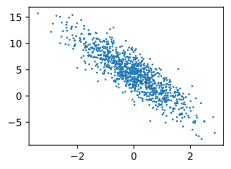

In [8]:
d2l.set_figsize()
#The semicolon isfordisplayingthe plotonly
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(), 1)
plt.show()

In [24]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [27]:

# Fonction avec yield
def generateur(x):
    for i in range(x):
        yield i
    

In [37]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.7087,  0.7425],
        [-1.3311,  0.5612],
        [ 0.3280,  0.1825],
        [ 1.8428, -0.9990],
        [-1.1580,  0.3027],
        [ 0.0735, -0.9442],
        [-0.5791, -0.5788],
        [ 1.6724, -1.3024],
        [-1.1917,  0.5401],
        [-0.9129, -0.1228]]) 
 tensor([[-1.7156],
        [-0.3718],
        [ 4.2461],
        [11.2815],
        [ 0.8480],
        [ 7.5597],
        [ 4.9976],
        [11.9744],
        [-0.0147],
        [ 2.7891]])


In [40]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w

tensor([[ 0.0010],
        [-0.0004]], requires_grad=True)

In [62]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y): 
    """Squared loss."""
    return ((y_hat- y.reshape(y_hat.shape)) ** 2 )/ 2

def sgd(params, lr, batch_size): #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [66]:
import torch
import torch.nn as nn

# Création d'un modèle simple
model = nn.Linear(10, 1)  # Couche linéaire avec 10 entrées, 1 sortie
params = [model.weight, model.bias]  # Paramètres à optimiser

print(f"params :{params}")

# Données d'exemple
X = torch.randn(32, 10)  # Batch de 32 exemples, 10 features
y = torch.randn(32, 1)   # Labels correspondants

# print(f"X :{X} /ny :{y}")

# Forward pass
predictions = model(X)

# print(f"Prediction :{predictions}")

# Calcul de la loss
loss = ((predictions - y) ** 2).mean()  # Loss MSE

print(f'loss : {loss}')

# Backward pass (calcul des gradients)
loss.backward()

# AVANT la mise à jour
print("Avant SGD:")
print(f"Poids grad: {model.weight.grad.norm():.4f}")
print(f"Biais grad: {model.bias.grad.norm():.4f}")

# Application de SGD
sgd(params, lr=0.01, batch_size=32)

# APRÈS la mise à jour
print("\nAprès SGD:")
print(f"Poids grad: {model.weight.grad.norm():.4f}")  # Doit être ~0

params :[Parameter containing:
tensor([[ 0.1961, -0.0153, -0.2945, -0.0667,  0.0521,  0.0565, -0.2400, -0.1807,
          0.2853,  0.1013]], requires_grad=True), Parameter containing:
tensor([-0.2693], requires_grad=True)]
loss : 1.554168701171875
Avant SGD:
Poids grad: 1.8893
Biais grad: 0.2969

Après SGD:
Poids grad: 0.0000


Parameter containing:
tensor([-0.2692], requires_grad=True)

In [72]:
import torch
import torch.nn as nn

# Données d'entraînement
X = torch.tensor([[1.0], [2.0], [3.0]])  # Features
y = torch.tensor([[2.0], [4.0], [6.0]])  # Labels (relation parfaite: y = 2*x)

# Paramètres initiaux (aléatoires)
w = torch.tensor([[1.5]], requires_grad=True)  # Poids - initialisé à 1.5 (devrait être 2.0)
b = torch.tensor([[0.5]], requires_grad=True)  # Biais - initialisé à 0.5 (devrait être 0.0)

params = [w, b]
lr = 0.1
batch_size = 3

print("=== ÉTAT INITIAL ===")
print(f"w = {w.item():.3f}, b = {b.item():.3f}")

=== ÉTAT INITIAL ===
w = 1.500, b = 0.500


In [70]:
# Calcul des prédictions
predictions = X @ w + b  # y_pred = w*x + b
print(f"\nPrédictions: {predictions.flatten()}")
print(f"Vraies valeurs: {y.flatten()}")

# Calcul de la loss (Mean Squared Error)
loss = ((predictions - y) ** 2).mean()
print(f"Loss initiale: {loss.item():.4f}")


Prédictions: tensor([2.0000, 3.5000, 5.0000], grad_fn=<ViewBackward0>)
Vraies valeurs: tensor([2., 4., 6.])
Loss initiale: 0.4167


In [86]:
import torch
import torch.nn as nn

# 1. RECRÉER les tenseurs avec requires_grad=True
w = torch.tensor([[1.5]], requires_grad=True)
b = torch.tensor([[0.5]], requires_grad=True)

# 2. Données d'exemple
X = torch.tensor([[1.0], [2.0], [3.0]])
y = torch.tensor([[2.0], [4.0], [6.0]])

print("=== ÉTAPE 1: FORWARD PASS ===")
# 3. Calcul des prédictions (cela crée le graphe de calcul)
predictions = X @ w + b
print(f"Prédictions: {predictions.flatten()}")

# 4. Calcul de la loss
loss = ((predictions - y) ** 2).mean()
print(f"Loss: {loss.item():.4f}")

print("\n=== ÉTAPE 2: VÉRIFICATION DES GRADIENTS AVANT backward() ===")
print(f"w.grad avant backward(): {w.grad}")  # Doit être None

print("\n=== ÉTAPE 3: BACKWARD PASS ===")
# 5. Calcul des gradients
loss.backward()

print("=== APRÈS backward() ===")
print(f"w.grad: {w.grad}")  # Ne devrait plus être None
print(f"b.grad: {b.grad}")

# 6. MAINTENANT on peut utiliser .item()
print(f"\n=== GRADIENTS DÉTAILLÉS ===")
print(f"w = {w.item():.3f}, grad_w = {w.grad.item():.4f}")
print(f"b = {b.item():.3f}, grad_b = {b.grad.item():.4f}")

# 7. Application de SGD
print("\n=== APPLICATION SGD ===")
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            if param.grad is not None:  # Vérification de sécurité
                param -= lr * param.grad / batch_size
                param.grad.zero_()
            else:
                print(f"Avertissement: gradient None pour un paramètre")

sgd([w, b], lr=0.1, batch_size=3)

print("=== APRÈS SGD ===")
print(f"w = {w.item():.3f}")
print(f"b = {b.item():.3f}")

=== ÉTAPE 1: FORWARD PASS ===
Prédictions: tensor([2.0000, 3.5000, 5.0000], grad_fn=<ViewBackward0>)
Loss: 0.4167

=== ÉTAPE 2: VÉRIFICATION DES GRADIENTS AVANT backward() ===
w.grad avant backward(): None

=== ÉTAPE 3: BACKWARD PASS ===
=== APRÈS backward() ===
w.grad: tensor([[-2.6667]])
b.grad: tensor([[-1.]])

=== GRADIENTS DÉTAILLÉS ===
w = 1.500, grad_w = -2.6667
b = 0.500, grad_b = -1.0000

=== APPLICATION SGD ===
=== APRÈS SGD ===
w = 1.589
b = 0.533


In [82]:
w.grad